# Linear Regression using Partial Derivation
In the following I will present a quick walk-through on how to use partial derivation (gradient descent) to train a linear regression estimator.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

To get data we want to fit, we first create a linear function with random slope and intercept and sample data from it. We define it using a slope m and intercept b that we initialize normally. Then we sample from this function using a normal distribution.

In [10]:
m = np.random.rand(1)[0]    
b = np.random.uniform(0,10)
ys = []
for i in range(20):
    model_value = m*i+b
    stddev = 0.5
    sampled_y = np.random.normal(model_value, stddev)
    ys.append(sampled_y)

We quickly plot the function and samples. We can see how the samples follow the linear function and are evenly distributed around it.

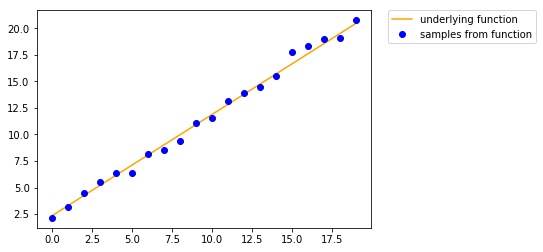

In [12]:
xs = np.arange(len(ys)) # some x values
plt.plot(xs,m*xs+b, label="underlying function",color="orange")
plt.plot(xs,ys,"o", label="samples from function",color="blue")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

We now want to approximate the function that we created using linear regression. Since we obviously know the true function, be reminded that in reality this is not the case. Therefore, we need to algorithmically estimate the parameters of this function.

We will be using partial derivation/gradient descent for this approach. We will start by initializing the slope *m* and intercept *b* randomly and then go on to iteratively update them, by partial derivation of an error-term in regard to the slope and intercept, respectively.

In the following cell we define our loss-function and update functions for computing the partial derivative.

In [13]:
# The loss function we are using. This is least-mean-squared-errors
def loss(slope, interc):
    error = 0
    for i in range(len(ys)):
        error += 0.5 * (slope*xs[i]+interc - ys[i])**2
    return error

# Functions for updating slope and intercept. This is done using the partial derivative of the loss
# in regards to the slope and intercept, respectively.
def update_m(slope, interc, error):
    update = 0
    for i in range(len(ys)):
        update += np.square(xs[i]) * (slope*xs[i] + interc - ys[i])
    return slope - 0.00001 * update

def update_b(slope, interc, error):
    update = 0
    for i in range(len(ys)):
        update += slope*xs[i] + interc - ys[i]
    return interc - 0.0001 * update  

Now that we have our functions, we can iteratively compute the error term and then update the slope *m* and the intercept *b* accordingly. 

At the end, we will plot our estimated model against the true function and the data and see how well it performed.


The true function has a slope of 0.9546, an intercept of 2.3387 and an error of 1.9911

The model function has a slope of 0.9794, an intercept of 2.1375 and an error of 1.8325 after 10000 iterations


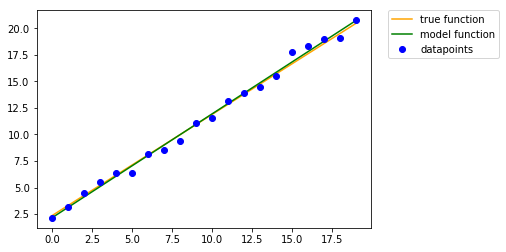

In [14]:
# Init m and b estimates and compute the first loss
m_ = 0
b_ = 0
error = loss(m_,b_)

# Arrays for tracking the progress of the values for plotting later on
slopes = []
intercepts = []
errors = []

iterations = 10000
for i in range(iterations):
    error =  loss(m_, b_)
    m_ = update_m(m_,b_, error)
    b_ = update_b(m_,b_, error)
    
    errors.append(error)
    slopes.append(m_)
    intercepts.append(b_)

print("\nThe true function has a slope of {}, an intercept of {} and an error of {}"
      .format(round(m,4),round(b,4),round(loss(m,b),4)))
print("\nThe model function has a slope of {}, an intercept of {} and an error of {} after {} iterations"
      .format(round(m_,4),round(b_,4),round(loss(m_,b_),4),iterations))
        
plt.plot(xs,m *xs+b , label="true function", color="orange")
plt.plot(xs,m_*xs+b_, label="model function",color="green")
plt.plot(xs,ys,"o",   label="datapoints",    color="blue")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Here are some plots to illustrate the progression of error, slope and intercept of our estimator. 

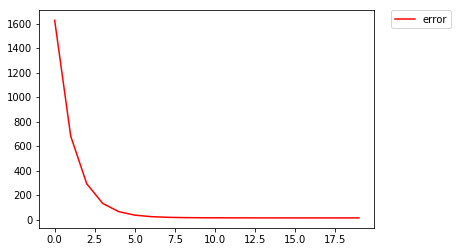

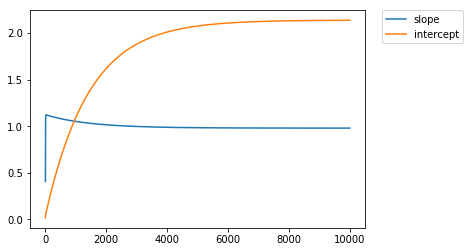

In [15]:
plt.plot(np.arange(20), errors[:20], label="error", color="red")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
plt.plot(np.arange(10000), slopes, label="slope")
plt.plot(np.arange(10000), intercepts, label="intercept")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()